#### 数据
数据解释：http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

下载地址：http://archive.ics.uci.edu/ml/machine-learning-databases/00294/

In [1]:
import pandas as pd

In [2]:
ccpp = pd.read_excel("ccpp.xlsx")

In [3]:
ccpp.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
ccpp.shape

(9568, 5)

In [5]:
x = ccpp[['AT','V','AP','RH']]
x.head()

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62


In [6]:
y = ccpp[['PE']]
y.head()

,PE
0,463.26
1,444.37
2,488.56
3,446.48
4,473.90


In [7]:
from sklearn.model_selection import train_test_split

# 划分测试集与验证集

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1)

In [8]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7176, 4) (2392, 4) (7176, 1) (2392, 1)


In [9]:
from sklearn.linear_model import LinearRegression

#线性回归

linreg = LinearRegression()
linreg.fit(x_train,y_train)
print(linreg.intercept_,linreg.coef_)

[460.05727267] [[-1.96865472 -0.2392946   0.0568509  -0.15861467]]


In [10]:
y_pred = linreg.predict(x_test)
from sklearn import metrics
import numpy as np
print("MSE:",metrics.mean_squared_error(y_test,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE: 20.83719154722035
RMSE: 4.564777272465805


In [11]:
from sklearn.model_selection import cross_val_predict

# 10 折交叉验证

predicted = cross_val_predict(linreg,x,y,cv = 10)
print("MES:",metrics.mean_squared_error(y,predicted))

MES: 20.793672509857537


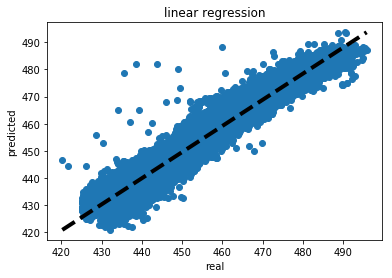

In [13]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.scatter(y,predicted)
ax.plot([y.min(),y.max()],[predicted.min(),predicted.max()],'k--',lw=4)
ax.set_title("linear regression")
ax.set_xlabel("real")
ax.set_ylabel("predicted")
plt.show()